# Customizing Plots

`geoplot` plots have a large number of styling parameters, both cosmetic (for example, the colors of the map borders) and informative (for example, the choice of colormap). This section of the tutorial will explain the highlights.

I recommend reading this notebook using [NBViewer](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Customizing_Plots.ipynb) or, better yet, following along interactively using [Binder](https://mybinder.org/v2/gh/ResidentMario/geoplot/master?filepath=notebooks/tutorials/Customizing_Plots.ipynb).

## Visual variables

A [**visual variable**](https://wiki.gis.com/wiki/index.php/Visual_variable) is an attribute of a plot that is used to convey information. In `geoplot` there are generally three visual variables: position, color, and size.

In [1]:
%matplotlib inline
import geopandas as gpd
import geoplot as gplt

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

### Position

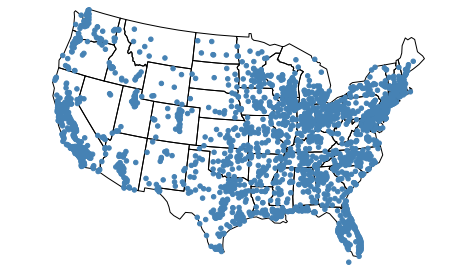

In [2]:
import geoplot.crs as gcrs

proj = gcrs.AlbersEqualArea()
ax = gplt.polyplot(contiguous_usa, projection=proj)
gplt.pointplot(continental_usa_cities, ax=ax)

This first plot of cities in the continental United States (locations with greater than 10,000 population) only has one visual variable, position. By examining the distribution of the points, we see that the part of the United States around the Rocky Mountains is more sparely populated than the coasts.

### Hue

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


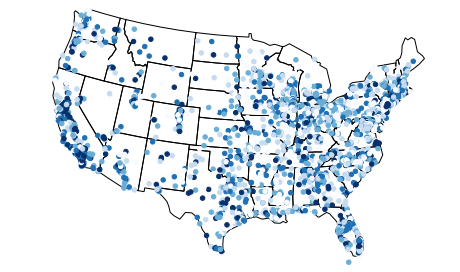

In [3]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, hue='POP_2010', cmap='Blues', ax=ax)

The `hue` parameter in `geoplot` adds color to your plot. In this case we set `hue='POP_2010'`, telling `geoplot` to color the points based on population as of the 2010 census. In this new map, the darker the point, the more populous the city.

There are a number of variables for controlling colors. One is `cmap`, which determines which `matplotlib` colormap is used:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, "cmap='coolwarm'")

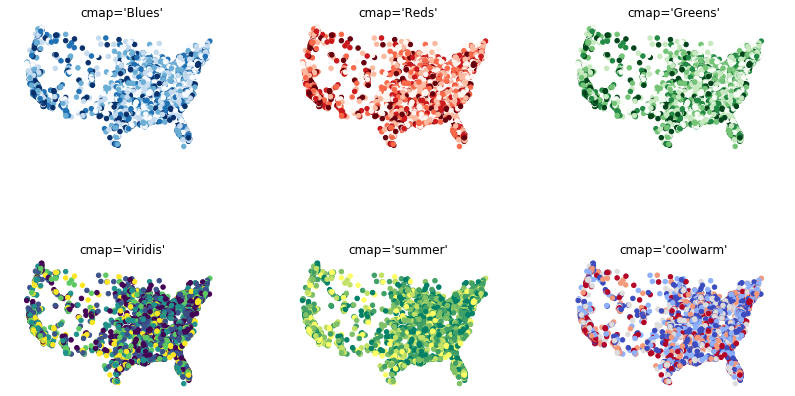

In [4]:
import matplotlib.pyplot as plt
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
fig, axarr = plt.subplots(2, 3, figsize=(14, 8), subplot_kw={'projection': proj})
pointplot_kwargs = {'hue': 'POP_2010'}

gplt.pointplot(continental_usa_cities, ax=axarr[0][0], cmap='Blues', **pointplot_kwargs)
axarr[0][0].set_title("cmap='Blues'")
gplt.pointplot(continental_usa_cities, ax=axarr[0][1], cmap='Reds', **pointplot_kwargs)
axarr[0][1].set_title("cmap='Reds'")
gplt.pointplot(continental_usa_cities, ax=axarr[0][2], cmap='Greens', **pointplot_kwargs)
axarr[0][2].set_title("cmap='Greens'")
gplt.pointplot(continental_usa_cities, ax=axarr[1][0], cmap='viridis', **pointplot_kwargs)
axarr[1][0].set_title("cmap='viridis'")
gplt.pointplot(continental_usa_cities, ax=axarr[1][1], cmap='summer', **pointplot_kwargs)
axarr[1][1].set_title("cmap='summer'")
gplt.pointplot(continental_usa_cities, ax=axarr[1][2], cmap='coolwarm', **pointplot_kwargs)
axarr[1][2].set_title("cmap='coolwarm'")

The **colormap** is the color scale of your plot, and it has big visual impact on your plot. There are over fifty named colormaps in `matplotlib`&mdash;[the reference page has the full list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). Naturally it is also possible to [create your own colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html); there is an [example](http://bl.ocks.org/ResidentMario/ac2db57d1c6652ddbc4112a3d318c746) of this in the [Gallery](https://residentmario.github.io/geoplot/gallery.html).

The [ColorBrewer paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.361.6082&rep=rep1&type=pdf) is a great summary of color theory as it pertains to mapmaking, and is a recommended read if you want to learn more about picking a color scale.

Suppose we've picked a colormap. The next choice we have to make is how to assign colors. There are two ways of assigning colors to geometries: a continuous colormap, which just applies colors on a spectrum of data; or a categorical colormap, which buckets data and applies colors not to those buckets.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'k=10')

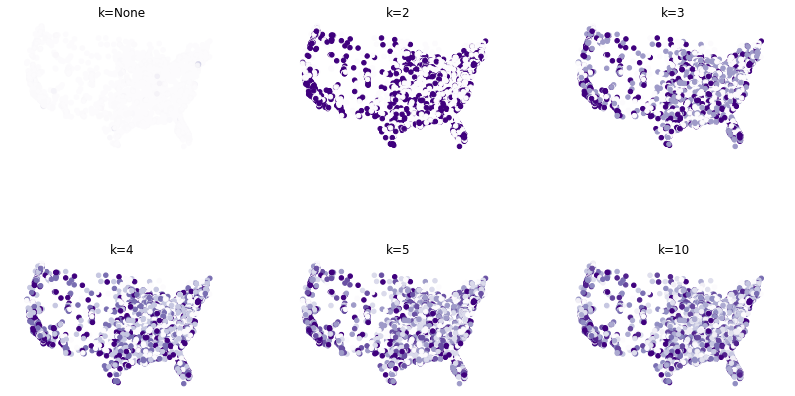

In [5]:
import matplotlib.pyplot as plt
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
fig, axarr = plt.subplots(2, 3, figsize=(14, 8), subplot_kw={'projection': proj})
pointplot_kwargs = {'hue': 'POP_2010', 'cmap': 'Purples'}

gplt.pointplot(continental_usa_cities, ax=axarr[0][0], k=None, **pointplot_kwargs)
axarr[0][0].set_title("k=None")
gplt.pointplot(continental_usa_cities, ax=axarr[0][1], k=2, **pointplot_kwargs)
axarr[0][1].set_title("k=2")
gplt.pointplot(continental_usa_cities, ax=axarr[0][2], k=3, **pointplot_kwargs)
axarr[0][2].set_title("k=3")
gplt.pointplot(continental_usa_cities, ax=axarr[1][0], k=4, **pointplot_kwargs)
axarr[1][0].set_title("k=4")
gplt.pointplot(continental_usa_cities, ax=axarr[1][1], k=5, **pointplot_kwargs)
axarr[1][1].set_title("k=5")
gplt.pointplot(continental_usa_cities, ax=axarr[1][2], k=10, **pointplot_kwargs)
axarr[1][2].set_title("k=10")

The `k` parameter controls how many colors are used. If it is set to `None`, as in the first plot, a continuous colormap is used. Otherwise as many colors are used as are set.

This dataset happens to be an example of a poor choice for a continuous colormap because there are outlier observations, like New York City, which are orders of magnitude larger than the mean value, rendering the (linear) color scale ineffectual. Here is an example where it is a more appropriate choice (in a plot measuring the percentage of the population of each county in New York which is white):

Text(0.5, 1.0, 'k=None, legend=True')

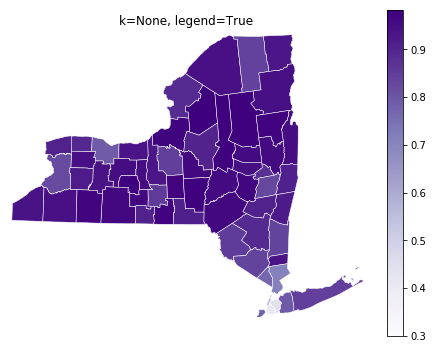

In [6]:
ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)
gplt.choropleth(
    ny_census_tracts, hue='percent_white', projection=gcrs.AlbersEqualArea(),
    cmap='Purples', linewidth=0.5, edgecolor='white', k=None, legend=True
)
plt.title("k=None, legend=True")

Another good example is the [Parking Tickets](https://residentmario.github.io/geoplot/examples/nyc-parking-tickets.html) demo in the [Gallery](https://residentmario.github.io/geoplot/gallery.html).

If you *are* using a categorical colormap, there is one last consideration you need to make: what [**binning scheme**](https://en.wikipedia.org/wiki/Data_binning) to use.

A binning scheme is a methodology for splitting a continuous dataset into discrete bins (which the colormap will then be applied to). The default binning scheme in `geoplot` is `quantiles`, which bins observations into classes of different sizes but the same numbers of observations. ``equal_interval`` will creates bins that are the same size, but potentially containing different numbers of observations. Finally, the more complicated ``fisher_jenks`` scheme is
an intermediate between the two; you can read about it [on Wikipedia](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization).

To use a non-default binning scheme, pass its name to the `scheme` parameter. The following plot of collisions in New York City by number of injuries demonstrates.

In [7]:
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_fatal_collisions = gpd.read_file(gplt.datasets.get_path('nyc_fatal_collisions'))
nyc_injurious_collisions = gpd.read_file(gplt.datasets.get_path('nyc_injurious_collisions'))

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'scheme="fisher_jenks"')

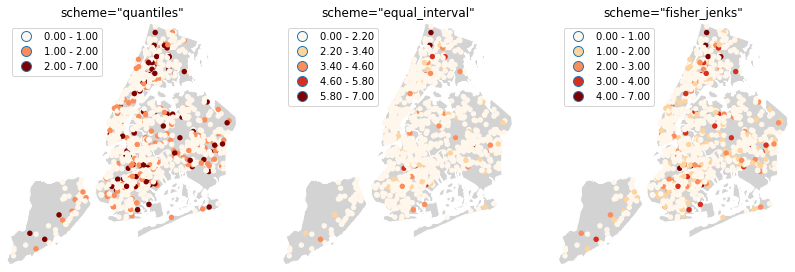

In [8]:
import matplotlib.pyplot as plt

polyplot_kwargs = {'facecolor': 'lightgray', 'edgecolor': 'white'}
pointplot_kwargs = {'hue': 'NUMBER OF PERSONS INJURED', 'linewidth': 0,
                    's': 30, 'zorder': 10, 'legend': True, 'cmap': 'OrRd', 'k': 5}

proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
fig, axarr = plt.subplots(1, 3, figsize=(14, 8), subplot_kw={'projection': proj})

gplt.pointplot(
    nyc_injurious_collisions.head(1000), scheme='quantiles', ax=axarr[0], **pointplot_kwargs
)
gplt.polyplot(nyc_boroughs, **polyplot_kwargs, ax=axarr[0])
axarr[0].set_title('scheme="quantiles"')

gplt.pointplot(
    nyc_injurious_collisions.head(1000), scheme='equal_interval', ax=axarr[1], **pointplot_kwargs
)
gplt.polyplot(nyc_boroughs, **polyplot_kwargs, projection=proj, ax=axarr[1])
axarr[1].set_title('scheme="equal_interval"')

gplt.pointplot(
    nyc_injurious_collisions.head(1000), scheme='fisher_jenks', ax=axarr[2], **pointplot_kwargs
)
gplt.polyplot(nyc_boroughs, **polyplot_kwargs, projection=proj, ax=axarr[2])
axarr[2].set_title('scheme="fisher_jenks"')

### Scale

Another visual variable present in some plots in `geoplot` is `scale`.

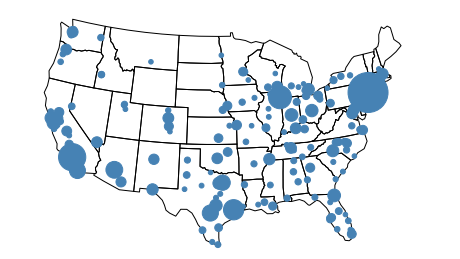

In [9]:
large_continental_usa_cities = continental_usa_cities.query('POP_2010 > 100000')

ax = gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(), scale='POP_2010', limits=(1, 80)
)
gplt.polyplot(contiguous_usa, ax=ax)

Scale uses the size of the feature to communication information about its magnitude. For example in this plot we can see more easily than in the `hue`-based plots how much larger certain cities (like New York City and Los Angeles) are larger than others.

`geoplot` uses a [linear scale](https://en.wikipedia.org/wiki/Linear_scale) and a relatively modest maximum and minimum point size by default. You can adjust the maxima and minima to your liking using the `limits` parameter. To use a different scale, like e.g. logarithmic, pass a scaling function to the `scale_func` parameter. The [Pointplot Scale Functions](https://residentmario.github.io/geoplot/examples/usa-city-elevations.html) demo in the [Gallery](https://residentmario.github.io/geoplot/gallery.html) demonstrates several such functions/scales in actions.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


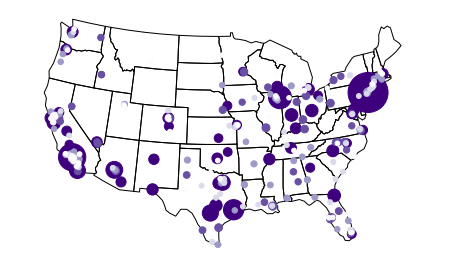

In [10]:
ax = gplt.pointplot(
    large_continental_usa_cities,
    projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(1, 80),
    hue='POP_2010', cmap='Purples'
)
gplt.polyplot(contiguous_usa, ax=ax)

Oftentimes you can get even better results by using both `hue` and `scale` in the same plot.

## Legend

A [**legend**](http://wiki.gis.com/wiki/index.php/Map_legend) provides a reference on the values that correspond to th visual variables in your plot. Legends are an important feature because they make your map interpretable. Without a legend, you can only map visual variables to relative magnitudes (e.g. you know which of two cities is bigger in the map above). With a legend, you can also map them to actual ranges of values as well.

To add a legend to your plot, set `legend=True`.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


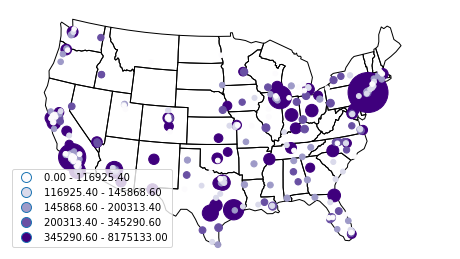

In [11]:
ax = gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(1, 80),
    hue='POP_2010', cmap='Purples',
    legend=True
)
gplt.polyplot(contiguous_usa, ax=ax)

With the addition of the legend we can now do things like pick out which are >3.4 million in population.

To switch to a scale-based legend instead of a color-based one, set `legend_var`:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


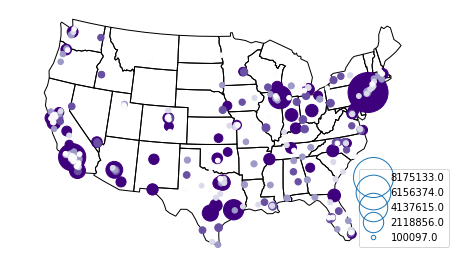

In [12]:
ax = gplt.pointplot(
    large_continental_usa_cities, projection=gcrs.AlbersEqualArea(),
    scale='POP_2010', limits=(1, 80),
    hue='POP_2010', cmap='Purples',
    legend=True, legend_var='scale'
)
gplt.polyplot(contiguous_usa, ax=ax)

To customize the legend values and labels use `legend_values` and `legend_labels`:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


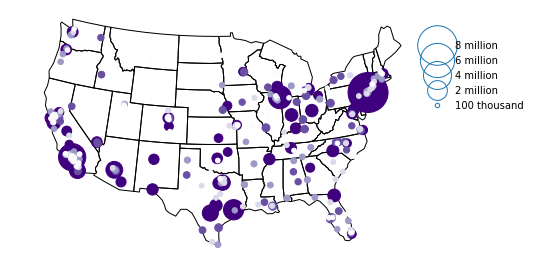

In [16]:
ax = gplt.pointplot(
    large_continental_usa_cities, projection=proj,
    scale='POP_2010', limits=(1, 80),
    hue='POP_2010', cmap='Purples',
    legend=True, legend_var='scale',
    legend_kwargs={'bbox_to_anchor': (0.92, 0.9), 'frameon': False},
    legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
    legend_labels=['8 million', '6 million', '4 million', '2 million', '100 thousand']
)
gplt.polyplot(contiguous_usa, ax=ax)

Finally, the `legend_kwargs` parameter lets you pass keyword arguments directly to the underlying `matplotlib` `Legend` object. A reference to the parameters available is in [the `matplotlib` documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html).

Two of the most useful parameters are `loc` and `bbox_to_anchor`, which may be used to position the (often awkardly placed) legend.

For an example of this parameter in action, see the [Largest US CIties](https://residentmario.github.io/geoplot/examples/largest-cities-usa.html) demo in the [Gallery](https://residentmario.github.io/geoplot/gallery.html).

## Extent

The **extent** of a plot is the span of its axes. In `geoplot` it is formatted as a tuple of `(min_longitude, min_latitude, max_longitude, max_latitude)`. For example, a plot covering the entire world would have a span of `(-180, -180, 180, 180)`.

The `extent` argument can be used to set the extent of a plot manually. This can be used to change the focus of a map. For example, here's a map of just populous cities in the state of California.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


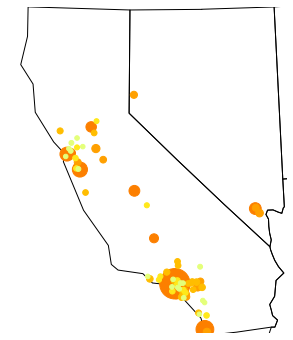

In [14]:
proj = gcrs.AlbersEqualArea(central_longitude=-119.1786315, central_latitude=37.0486535)
ax = gplt.pointplot(
    large_continental_usa_cities, projection=proj,
    scale='POP_2010', limits=(1, 100),
    hue='POP_2010', cmap='Wistia'
)
gplt.polyplot(
    contiguous_usa, ax=ax,
    extent=contiguous_usa.query('state == "California"').total_bounds
)

The [`total_bounds`](http://geopandas.org/reference.html#geopandas.GeoSeries.total_bounds) property on a `GeoDataFrame`, which returns the extent bounding box values for a given chunk of data, is extremely useful for this purpose.

## Cosmetic parameters

Keyword arugments that are not interpreted as arguments to `geoplot` are instead passed directly to the underlying `matplotlib` chart instance. This means that all of the usual `matplotlib` plot customization options are there.

While it's out of the scope of this guide to go through these options comprehensively, here are the most common parameters you will want to tweak:

* `edgecolor`&mdash;Controls the color of the border lines.
* `linewidth`&mdash;Controls the width of the border lines.
* `facecolor`&mdash;Controls the color of the fill of the shape.

By combining all of the things we've learned thus far in this guide with a few `matplotlib` customizations we can generate some very pretty-looking plots:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

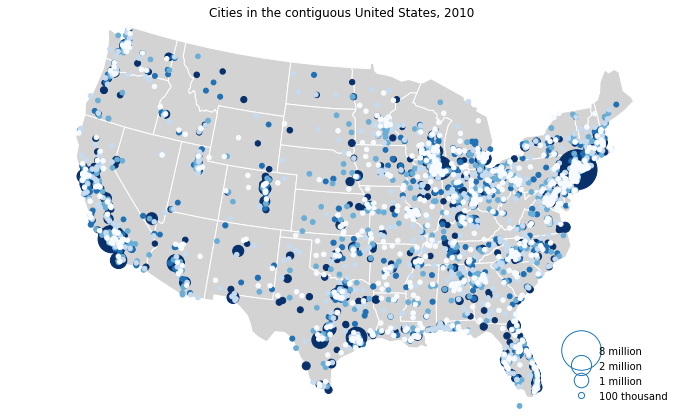

In [15]:
import matplotlib.pyplot as plt

proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    contiguous_usa, 
    zorder=-1,
    linewidth=1,
    projection=proj,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)
)

gplt.pointplot(
    continental_usa_cities, 
    scale='POP_2010',
    limits=(1, 80),
    hue='POP_2010',
    cmap='Blues',
    k=5,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Cities in the contiguous United States, 2010")

The ["Styling your plots"](https://www.kaggle.com/residentmario/styling-your-plots) guide on Kaggle is a good reference on `matplotlib` styling in a nutshell.